In [1149]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import sklearn 
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc


%matplotlib inline

In [1150]:
df = pd.read_csv ('titanic.csv')
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [1151]:
#Changing the data type of the "Survived" and "Pclass" column 
df.Survived = df.Survived.astype(float)
df.Pclass = df.Pclass.astype(float)

In [1152]:
df.dtypes

Survived                   float64
Pclass                     float64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [1153]:
#Average age on board 
sum(df.Age) / len(df.Age)

29.471443066516347

In [1154]:
#Isolating only those who survivded...
sum(df.Survived)

342.0

In [1155]:
#Sorting passengers by the price of their fare...
df.sort_values('Fare')

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
275,0.0,2.0,Mr. Francis Parkes,male,21.0,0,0,0.0000
478,0.0,2.0,Mr. Anthony Wood Frost,male,37.0,0,0,0.0000
411,0.0,2.0,Mr. Alfred Fleming Cunningham,male,22.0,0,0,0.0000
594,0.0,3.0,Mr. Alfred Johnson,male,49.0,0,0,0.0000
630,0.0,1.0,Mr. William Henry Marsh Parr,male,30.0,0,0,0.0000
...,...,...,...,...,...,...,...,...
27,0.0,1.0,Mr. Charles Alexander Fortune,male,19.0,3,2,263.0000
339,1.0,1.0,Miss. Alice Elizabeth Fortune,female,24.0,3,2,263.0000
733,1.0,1.0,Mr. Gustave J Lesurer,male,35.0,0,0,512.3292
257,1.0,1.0,Miss. Anna Ward,female,35.0,0,0,512.3292


In [1156]:
avg_fare = sum(df.Fare.astype(int)) / len(df.Fare.astype(int))

In [1157]:
#Average Survival Rate 
#Average of people who survived 
avg_survived = sum(df.Survived) / len(df.Survived)
avg_survived

0.3855693348365276

In [1158]:
#Comparing females who died to males.

In [1159]:
#Average of Females who Survived on Board 
Female = df[df.Sex == 'female']
avg_Sfemale = df.loc[(df['Sex'] == 'female') & (df['Survived'] == 1)]
avg_Dfemale = df.loc[(df['Sex'] == 'female') & (df['Survived'] == 0)]
Female_survival = sum(avg_female.Survived) / len(Female.Survived)
Female_survival = Female_survival *100
Female_survival

74.20382165605095

In [1160]:
#Average of males who Survived on Board 
male = df[df.Sex == 'male']
avg_Smale = df.loc[(df['Sex'] == 'male') & (df['Survived'] == 1)]
avg_Dmale = df.loc[(df['Sex'] == 'male') & (df['Survived'] == 0)]
Male_survival = sum(avg_Smale.Survived) / len(male.Survived)
Male_survival = Male_survival * 100
Male_survival

19.022687609075042

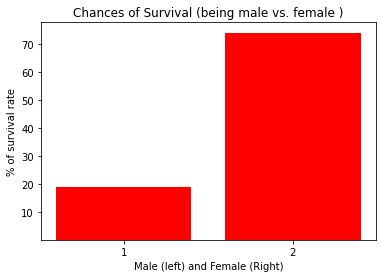

In [1161]:
x = [1,2]
y = Male_survival, Female_survival


plt.xticks ([1,2])
plt.yticks ([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title ('Chances of Survival (being male vs. female )')
plt.xlabel ('Male (left) and Female (Right)')
plt.ylabel ('% of survival rate')
plt.bar(x,y, color = 'red',)
plt.show()

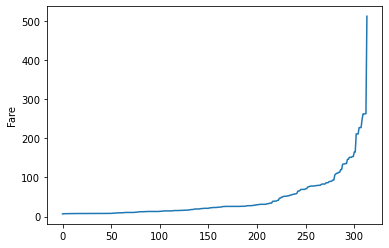

In [1162]:
plt.plot(avg_female_sorted.Fare)
plt.ylabel('Fare')
plt.show()

In [1163]:
avg_male_sorted = avg_male.sort_values('Fare')
avg_male_sorted = avg_male_sorted.reset_index(drop = True)
avg_male_sorted.Fare

0        0.0000
1        0.0000
2        0.0000
3        0.0000
4        0.0000
         ...   
568    247.5208
569    263.0000
570    263.0000
571    512.3292
572    512.3292
Name: Fare, Length: 573, dtype: float64

In [1164]:
len(Female)

314

In [1165]:
len(Male)

573

In [1166]:
#Finding out how your fare may have effected your chances of survival
sum(male.Survived)

109.0

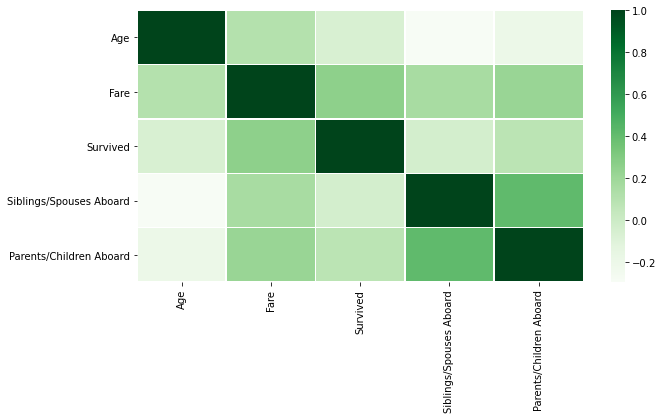

In [1167]:
plt.figure(figsize = (10,5))
sns.heatmap(df_num.corr(), annot = False, linewidth = 0.5, cmap = 'Greens')

In [1168]:
#Comparing Survival odds based off of the the class you were on the ship 

In [1169]:
Pclass1 = df.loc[(df['Pclass'] == 1.0)]
Pclass1 = sum (Pclass1.Survived)
Pclass1

136.0

In [1170]:
Pclass2 = df.loc[(df['Pclass'] == 2.0)]
Pclass2 = sum(Pclass2.Survived)
Pclass2

87.0

In [1171]:
Pclass3 = df.loc[(df['Pclass'] == 3.0)]
Pclass3 = sum(Pclass3.Survived)
Pclass3

119.0

In [1172]:
Dead1 = df.loc[(df['Survived'] == 0) & (df['Pclass'] == 1)]
Dead1 = len(Dead1)
Dead1

80

In [1173]:
Dead2 = df.loc[(df['Survived'] == 0) & (df['Pclass'] == 2)]
Dead2 =len(Dead2)
Dead2

97

In [1174]:
Dead3 = df.loc[(df['Survived'] == 0) & (df['Pclass'] == 3)]
Dead3 = len(Dead3)
Dead3

368

In [1175]:
Class = ["First Class", "Second Class", "Third Class", ]
Class

['First Class', 'Second Class', 'Third Class']

In [1176]:
x = Class
y = [136, 87, 119]
deaths = [80, 97, 368]

In [1177]:
dpos = np.arange(len(deaths))
xpos = np.arange(len(Class))
dpos

array([0, 1, 2])

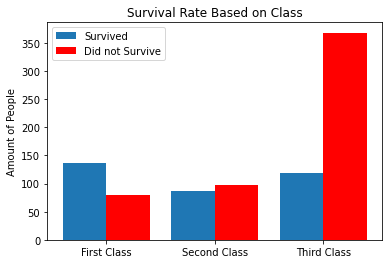

In [1178]:
plt.xticks(xpos, Class)
plt.ylabel('Amount of People')
plt.title ('Survival Rate Based on Class')
plt.bar(xpos -0.2,y, width = 0.4, label = "Survived")
plt.bar(xpos +0.2, deaths, width = 0.4, color = 'red', label = 'Did not Survive')
plt.legend()
plt.show()

In [1179]:
Rich = df.loc[(df['Fare'] > 100)]
len(Rich.Fare) / 887

0.05975197294250282

In [1180]:
Poor = df.loc[(df['Fare'] < 100)]
len(Poor) / 887

0.9402480270574972

In [1181]:
sum(Rich.Survived) / len(Rich.Survived)

0.7358490566037735

In [1182]:
Female = df[df.Sex == 'female']
len(Female)

314

In [1183]:
len(male)

573

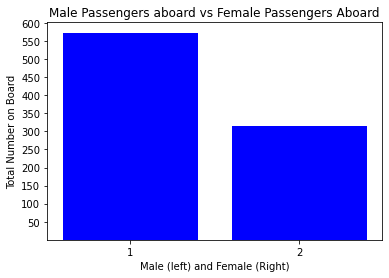

In [1184]:
x = [1,2]
y = len(male), len(Female)

plt.xticks ([1,2])
plt.yticks ([50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600])
plt.title ('Male Passengers aboard vs Female Passengers Aboard')
plt.xlabel ('Male (left) and Female (Right)')
plt.ylabel ('Total Number on Board')
plt.bar(x,y, color = 'blue',)
plt.show()

In [1185]:
df_num = df[['Age', 'Fare', 'Survived', 'Siblings/Spouses Aboard', 'Parents/Children Aboard']]


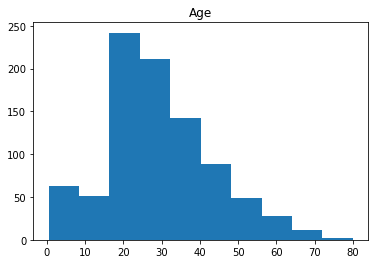

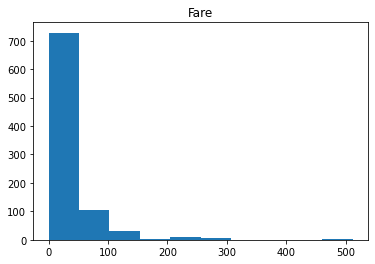

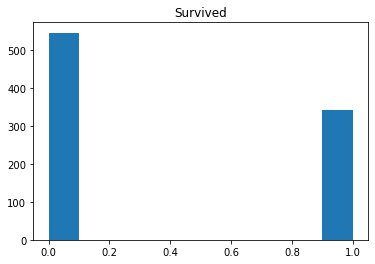

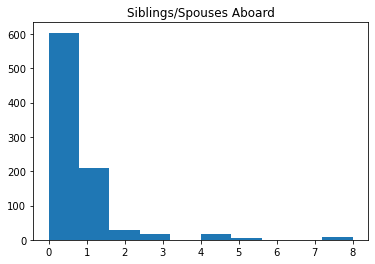

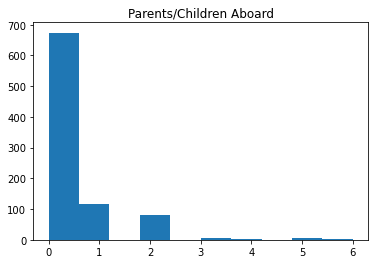

In [1186]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [1187]:
pd.pivot_table(df, index = 'Survived', values = ['Age', 'Fare', 'Siblings/Spouses Aboard', 'Parents/Children Aboard'])

,Age,Fare,Parents/Children Aboard,Siblings/Spouses Aboard
Survived,,,,
0.0,30.138532,22.208584,0.332110,0.557798
1.0,28.408392,48.395408,0.464912,0.473684


In [1188]:
df_nonnum = df[['Survived', 'Pclass', 'Sex']]

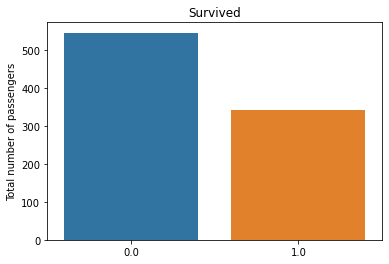

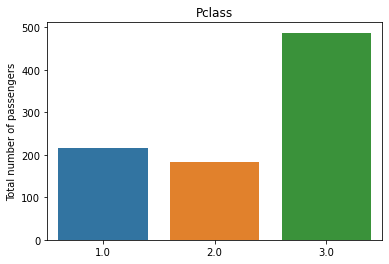

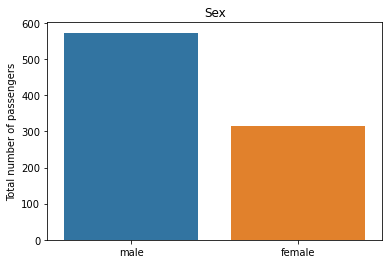

In [1189]:
for i in df_nonnum.columns:
    sns.barplot(df_nonnum[i].value_counts().index, df_nonnum[i].value_counts()).set_title(i)
    plt.ylabel('Total number of passengers')
    plt.show()

In [1208]:
data = pd.read_csv('titanic.csv')

In [1211]:
y_train = data.pop('Survived')

KeyError: 'Survived'

In [1210]:
y_eval = data.pop('Survived')

KeyError: 'Survived'

In [1206]:
feature_columns = []
for feature_name in df_nonnum:
  vocab = df[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocab))

for feature_name in df_nums:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

KeyError: 'Survived'